In [2]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import plotly.express as px

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#import os as os; os.remove('paper-Ftable.pkl')
%run utils/Paper_Histogramas_Configuracion-nuevaconf.ipynb

[*] => catalogue <= [*]
[*] Se carga el archivo: paper-Ftable.pkl
       Cantidad de datos: 162019 (tablas/Fornax_VAC_RUN1+RUN2_gal_mag_err_XY_mumax_flags_no_Vr.fits)

       Cantidad de datos filtrados: 103539

[*] => Fornax
       Cantidad de datos: 164 (tablas/Literature_RUN1+RUN2_gal_mag_err_XY_mumax_flags_VR.fits)
       Cantidad de datos filtrados: 163

[*] => Background (cross-match de 3 arcsec)
       Se encontraron 332 fuentes duplicadas (ID)
       Cantidad de datos: 3217 (tablas/SpecZ_Catalogue_V6_Fornax.fits)

[*] => SPLUS
       Cantidad de datos: 100322


In [3]:
# Selecciona filtro G_auto
f = filters[5].replace("_auto","")
#
# Modifico el THETA_IMAGE para que abarque 0 a pi/2 y agrego el label
for tabla, label in zip([ Fornax, Background, Splus ], [ 'Fornax', 'Background', 'Splus' ]):
    tabla['THETA_IMAGE2'] = tabla.apply ( lambda x: 180.0 - np.abs(x['THETA_IMAGE']) if x['THETA_IMAGE'] < 0 else x['THETA_IMAGE'], axis = 1 )
    tabla['label'] = label

    list = []
    for pair in itertools.combinations ( filters, r = 2 ):
        tabla[ pair[0] + '-' + pair[1] ] = tabla [ pair[0] ] - tabla [ pair[1] ]
        list.append(pair[0] + '-' + pair[1])
# 
Fornax.rename ( columns={"DEC_1": "DEC"}, inplace = True )

columnas = list.copy()
columnas.extend(filters)
columnas = [ 'R_t_' + f + ' [arcsec]', 'R_e_' + f + ' [arcsec]', '<mu_e_' + f + '>', 'A_IMAGE', 'B_IMAGE', 'ELONGATION', 'ELLIPTICITY', 'CLASS_STAR_' + f, 
            'THETA_IMAGE2', 'D_NGC1316 [arcsec]', 'D_NGC1399 [arcsec]', *columnas ]

columnas = [ 'ID', 'RA', 'DEC', *columnas ]

columnas.extend ( ['label'] )
datos = pd.concat ( [Splus[columnas], Fornax[columnas], Background[columnas]], ignore_index = True )

df = datos.drop( ['ID', 'RA', 'DEC', 'label'], axis = 1 )
df.mask ( df[filters] > 30, np.nan, inplace = True )
datos = pd.concat( [ datos[['ID', 'RA', 'DEC']], df, datos['label'] ], axis = 1 ).dropna()
datos

ID         RA        DEC  \
0       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00486'  41.631114 -30.995514   
1       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00494'  41.631454 -31.130897   
3       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00838'  41.650450 -30.290130   
4       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01417'  41.681696 -31.291301   
5       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01685'  41.696469 -30.998878   
...                                        ...        ...        ...   
103697  b'iDR4_FORNAX_RUN2_SPLUS-s30s34.01434'  56.127114 -38.277830   
103698  b'iDR4_FORNAX_RUN2_SPLUS-s30s34.04477'  56.604197 -38.221800   
103699  b'iDR4_FORNAX_RUN2_SPLUS-s30s35.01089'  57.755179 -38.272339   
103700  b'iDR4_FORNAX_RUN2_SPLUS-s30s35.01184'  57.766833 -38.255017   
103701  b'iDR4_FORNAX_RUN2_SPLUS-s30s35.07007'  58.469233 -38.278738   

        R_t_G [arcsec]  R_e_G [arcsec]   <mu_e_G>    A_IMAGE   B_IMAGE  \
0             8.309404        1.763875  23.415157   2.644781  1.689814   
1             3.545721        1.460416  23.498930   1.654280  1.338583   
3             2.092938        1.380225  23.485165   2.576553  1.844335   
4             3.008652        1.179790  23.314354   1.547233  1.318853   
5             2.453251        1.103169  23.168636   1.539985  1.360538   
...                ...             ...        ...        ...       ...   
103697        7.240654       18.148571  24.362423   7.847497  6.171810   
103698        1.612781        4.954468  22.625767   4.175016  3.136086   
103699        7.092597       15.156689  24.448765  14.278614  4.470533   
103700        3.776172        8.528788  23.466248   6.759922  4.196586   
103701        6.056499       17.359285  22.994713  16.280014  5.442778   

        ELONGATION  ELLIPTICITY  ...  F410_auto  F430_auto     G_auto  \
0         1.565132     0.361076  ...  20.319691  20.654846  20.187368   
1         1.235844     0.190836  ...  21.745457  23.374861  20.681097   
3         1.397009     0.284185  ...  21.829075  20.795452  20.789965   
4         1.173166     0.147605  ...  21.519556  21.141966  20.959881   
5         1.131894     0.116525  ...  22.656456  23.974762  20.959976   
...            ...          ...  ...        ...        ...        ...   
103697    1.271507     0.213531  ...  17.218740  16.849586  16.072760   
103698    1.331282     0.248845  ...  17.636992  17.640739  17.155331   
103699    3.193940     0.686907  ...  16.675964  16.257935  16.550293   
103700    1.610815     0.379196  ...  17.053417  16.951550  16.816360   
103701    2.991122     0.665677  ...  15.299932  15.085299  14.801603   

        F515_auto     R_auto  F660_auto     I_auto  F861_auto     Z_auto  \
0       20.009787  19.536341  19.494389  19.290092  19.362717  19.143654   
1       20.697109  20.344015  20.051886  19.956814  19.696072  19.963938   
3       20.628223  19.750694  19.722986  19.390114  19.163509  19.069284   
4       20.408569  20.261456  20.504328  19.960169  19.874748  19.982998   
5       20.228800  20.326231  19.941338  20.295328  19.809275  20.289444   
...           ...        ...        ...        ...        ...        ...   
103697  15.868580  15.536016  15.420098  15.187694  15.063860  14.851381   
103698  16.911526  16.467068  16.382587  16.167385  15.977934  15.993571   
103699  16.098923  15.967901  15.930536  15.626563  15.169764  15.266159   
103700  16.438709  16.368843  16.396538  16.156145  15.983702  15.903543   
103701  14.561247  14.095365  13.990125  13.724329  13.542924  13.433832   

             label  
0            Splus  
1            Splus  
3            Splus  
4            Splus  
5            Splus  
...            ...  
103697  Background  
103698  Background  
103699  Background  
103700  Background  
103701  Background  

[62845 rows x 93 columns]

In [12]:
len(catalogue['Field'].sort_values().unique())

106

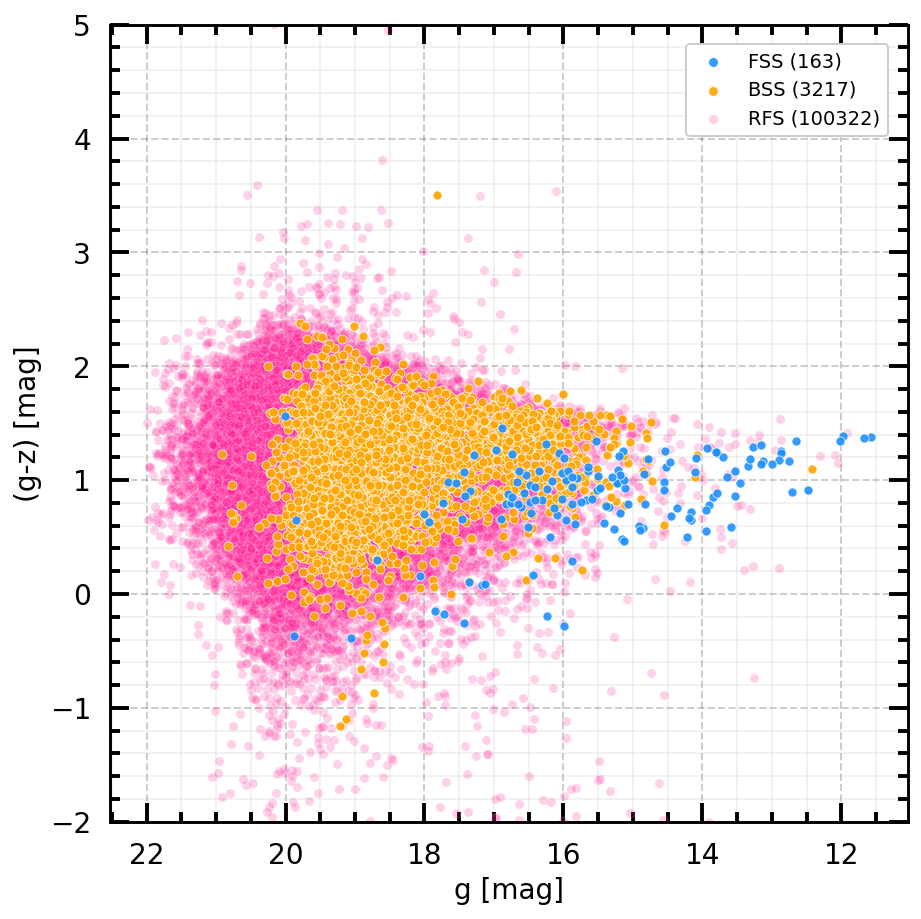

In [29]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

x = 'G_auto'; y = 'G_auto-Z_auto'
ax0.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
             linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
ax0.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
             linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 3 )
ax0.scatter ( x, y, data = datos[datos['label'] == "Splus" ], s = size*2.2, alpha = 0.2, edgecolors = 'white', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS (%i)' % (len(Splus)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 2 )

for a in [ ax0 ]:
    a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

ax0.invert_xaxis()
ax0.set_xlabel ( "g [mag]" )
ax0.set_ylabel ( "(g-z) [mag]" )
    
for a in [ ax0 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_CMR.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

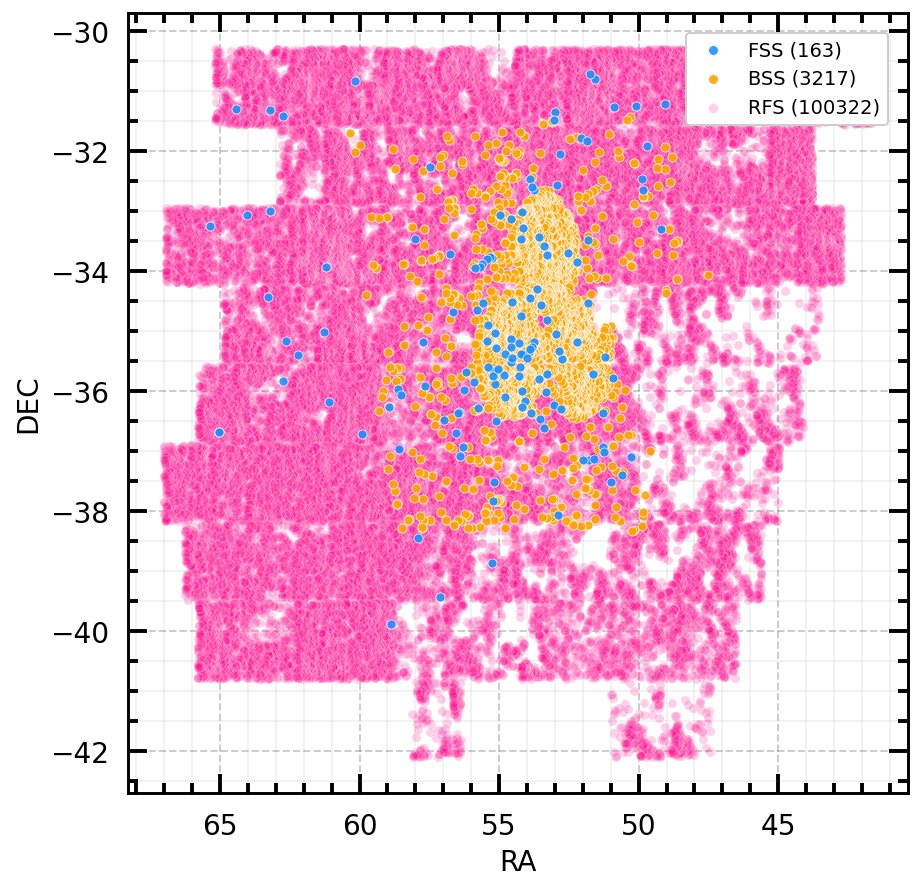

In [30]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

x = 'RA'; y = 'DEC'
ax0.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
             linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
ax0.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
             linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 3 )
ax0.scatter ( x, y, data = datos[datos['label'] == "Splus" ], s = size*2.2, alpha = 0.2, edgecolors = 'white', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS (%i)' % (len(Splus)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 2 )
    
for a in [ ax0 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "RA" )
    a.set_ylabel ( "DEC" )

for a in [ ax0 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_RADEC.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

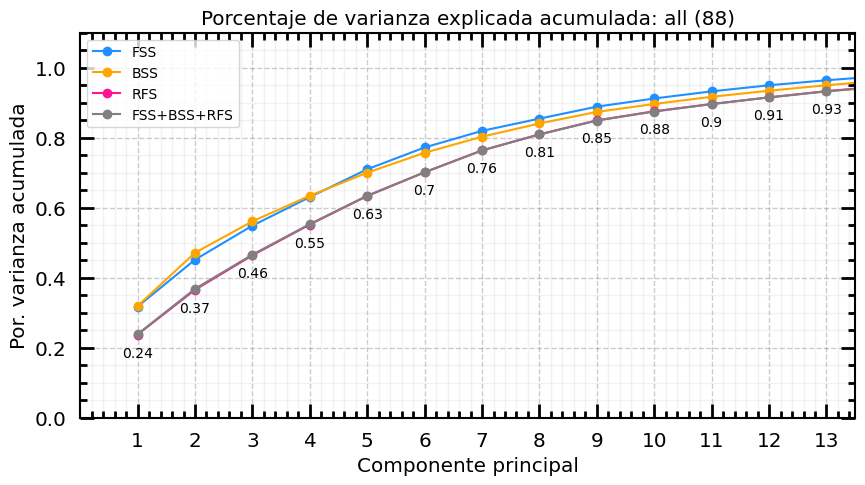

In [14]:
features = [ x for x in datos if ((x != 'label') & (x != 'ID') & (x != 'RA') & (x != 'DEC') & (x != 'z')& (x != 'CLASS_STAR_G')) ] # Les saco las columnas no numericas

prop_varianza_acum = [ ] 
prop_varianza_ratio = [ ] 
prop_components = [ ] 

for l_train in [ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]:
    if l_train == 'Fornax+Background+Splus':
        data = datos [ (datos['label'] == 'Fornax') | (datos['label'] == 'Background') | (datos['label'] == 'Splus') ][features]
    else:
        data = datos [ datos['label'] == l_train ][features]

    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    #pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=3)) # Se pueden definir la cant de componentes a calcular.
    pca_pipe.fit(data)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']

    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum.append ( modelo_pca.explained_variance_ratio_.cumsum() )
    prop_varianza_ratio.append ( modelo_pca.explained_variance_ratio_ )
    prop_components.append ( modelo_pca.components_ )

n_com = modelo_pca.n_components_
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize = (10, 5), dpi = 100 )

for i, (l, c) in enumerate(zip([ 'FSS', 'BSS', 'RFS', 'FSS+BSS+RFS' ],  [ 'dodgerblue', 'orange', 'deeppink', 'gray' ])):
    ax.plot(
        np.arange(n_com) + 1,
        prop_varianza_acum[i],
        marker = 'o',
        color = c,
        label = l
    )

for x, y in zip(np.arange(n_com) + 1, prop_varianza_acum[2]):
    labelp = round(y, 2)
    ax.annotate(
        labelp,
        (x,y),
        textcoords = "offset points",
        xytext = (0,-16),
        ha = 'center'
    )

ax.minorticks_on()
ax.grid ( b = True, which = 'major', color = 'black', linestyle = '--', alpha = 0.3, zorder = 0.0 )
ax.grid ( b = True, which = 'minor', color = 'gray', linestyle = '-', alpha = 0.3, zorder = 0.0 )
ax.tick_params ( axis = "y", direction = "inout" )
ax.tick_params ( axis = "x", direction = "inout" )

custom_axes ( ax )
n_com = 13
ax.set_ylim(0, 1.1)
ax.set_xlim(0, n_com + 0.5)
#ax.set_xticks(np.arange(9) + 1.0)  
ax.set_xticks(np.arange(n_com) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada: all (%s)' %(modelo_pca.n_components_))
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
ax.legend()
plt.savefig ( "figures/Fornax-PCA_01.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

n_com = modelo_pca.n_components_

In [15]:
var_exp = pd.DataFrame()
#
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
for i, l in enumerate([ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]):
    var_exp.loc[:, l] = pd.Series( prop_varianza_ratio[i], name = l, index = [ "PC" + str(j+1) for j in range(len(prop_varianza_ratio[i])) ] )

def xy_labels(train):
    return [ "%s (%.1f%%)" %(com, var) for com, var in zip(var_exp.index, var_exp[train] * 100) ]

var_exp

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


Fornax    Background         Splus  Fornax+Background+Splus
PC1   3.170949e-01  3.190806e-01  2.371910e-01             2.383221e-01
PC2   1.339178e-01  1.517628e-01  1.279080e-01             1.294411e-01
PC3   9.734059e-02  8.977976e-02  9.845344e-02             9.777794e-02
PC4   8.157866e-02  7.316292e-02  8.802631e-02             8.722875e-02
PC5   7.950117e-02  6.588296e-02  8.147199e-02             8.119510e-02
...            ...           ...           ...                      ...
PC84  1.197413e-33  1.936683e-33  8.231961e-34             1.056145e-33
PC85  1.197413e-33  1.936683e-33  3.866155e-34             7.397525e-34
PC86  1.197413e-33  1.936683e-33  3.131707e-34             6.926199e-34
PC87  5.857569e-34  1.936683e-33  2.629994e-34             1.426866e-34
PC88  5.454057e-34  1.936683e-33  9.746052e-35             1.333499e-34

[88 rows x 4 columns]

In [16]:
coeff_tmp= pd.DataFrame()

for i, l in enumerate([ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]):
    print (l)
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    coeff = pd.DataFrame ( data = prop_components[i].T, columns = [ "PC" + str(j+1) + " (" + l + " trained)" for j in range(len(prop_components[i])) ], index = features )

    coeff = pd.concat ( [coeff_tmp, coeff.set_index(coeff.index)],  axis = 1 )
    coeff_tmp = coeff.copy()

Fornax
Background
Splus
Fornax+Background+Splus


In [17]:
components_tmp = pd.DataFrame()
proyecciones = datos.copy()

for l_train in [ 'Fornax', 'Background', 'Splus', 'Fornax+Background+Splus' ]:
    if l_train == 'Fornax+Background+Splus':
        train = datos [ (datos['label'] == 'Fornax') | (datos['label'] == 'Background') | (datos['label'] == 'Splus') ][features]
    else:
        train = datos [ datos['label'] == l_train ][features]

    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit ( train )

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']

    #
    components = pca_pipe.transform ( datos[features] )
    components_tmp = pd.DataFrame ( components, columns = [ "PC" + str(j+1) + " (" + l_train + " trained)" for j in range(len(components[0,:])) ] )
    proyecciones = pd.concat ( [proyecciones, components_tmp.set_index(proyecciones.index)],  axis = 1 )
#proyecciones

In [18]:
proyecciones[[ "PC" + str(j+1) + " (Fornax+Background+Splus trained)" for j in range(len(components[0,:])) ]]

PC1 (Fornax+Background+Splus trained)  \
0                                   -0.548655   
1                                   -0.659849   
3                                    7.093759   
4                                    2.793352   
5                                   -0.864998   
...                                       ...   
103697                              11.012647   
103698                               3.399878   
103699                               1.432029   
103700                              -0.451987   
103701                               5.009150   

        PC2 (Fornax+Background+Splus trained)  \
0                                   -3.679931   
1                                   -7.654061   
3                                   -5.566333   
4                                   -4.914500   
5                                   -8.106271   
...                                       ...   
103697                               8.387521   
103698                               4.969311   
103699                              10.158244   
103700                               7.594412   
103701                              14.312479   

        PC3 (Fornax+Background+Splus trained)  \
0                                   -1.540577   
1                                   -3.750636   
3                                    3.410976   
4                                    5.428221   
5                                   -5.495822   
...                                       ...   
103697                               0.423195   
103698                              -1.382447   
103699                               0.060386   
103700                              -0.761413   
103701                              -1.856029   

        PC4 (Fornax+Background+Splus trained)  \
0                                   -2.378072   
1                                    1.947880   
3                                    0.208171   
4                                    0.752270   
5                                    5.588621   
...                                       ...   
103697                              -2.849126   
103698                              -0.976492   
103699                              -0.004736   
103700                              -0.076915   
103701                              -0.183883   

        PC5 (Fornax+Background+Splus trained)  \
0                                   -0.827694   
1                                    7.104304   
3                                   -4.613035   
4                                   -2.480509   
5                                    8.394510   
...                                       ...   
103697                              -3.505529   
103698                               0.247668   
103699                               0.126435   
103700                               0.383869   
103701                               1.444362   

        PC6 (Fornax+Background+Splus trained)  \
0                                   -1.309832   
1                                    1.104478   
3                                   -4.486205   
4                                   -2.576962   
5                                   -1.262824   
...                                       ...   
103697                              -7.405027   
103698                              -0.454637   
103699                               0.647661   
103700                              -1.272301   
103701                               0.993504   

        PC7 (Fornax+Background+Splus trained)  \
0                                   -0.987052   
1                                    1.551909   
3                                   -3.318536   
4                                   10.883143   
5                                    3.799845   
...                                       ...   
103697                              -1.805714   
103698                              -0.109588   
103699                           

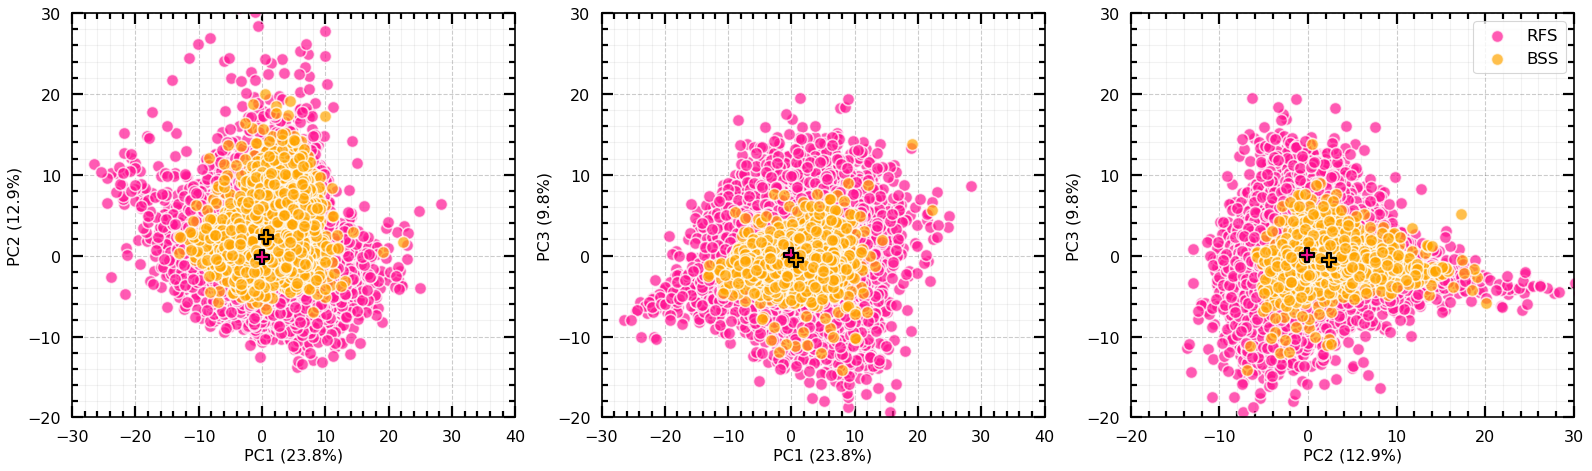

In [19]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )

l_train = 'Fornax+Background+Splus'; PC1min = -30; PC1max = 40;  PC2min = -20; PC2max = 30;  PC3min = -20; PC3max = 30
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]], [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  
    
#    for c, label, color in zip([ 'Splus', 'Background','Fornax' ], [ 'RFS', 'BSS', 'FSS' ], [ 'deeppink', 'orange', 'dodgerblue' ]):
#    for c, label, color in zip([ 'Splus', 'Fornax' ], [ 'RFS', 'FSS' ], [ 'deeppink', 'dodgerblue' ]):
    for c, label, color in zip([ 'Splus', 'Background' ], [ 'RFS', 'BSS' ], [ 'deeppink', 'orange' ]):
#    for c, label, color in zip([ 'Background','Fornax' ], [ 'BSS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )
        a.scatter ( df[x].mean() , df[y].mean(), #label = "C$_{\mathrm{%s}}$" %(label), 
                   s = size*1.0, alpha = 1.0, edgecolors = 'black', color = color, marker = 'P', linewidth = 2, zorder = 3 )
    #biplot ( coeff, x, y, features, scale = 30, arrow_size = 0.11, linewidth = 4, ax = a )
    
    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'upper right', fontsize = 15 )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_02.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

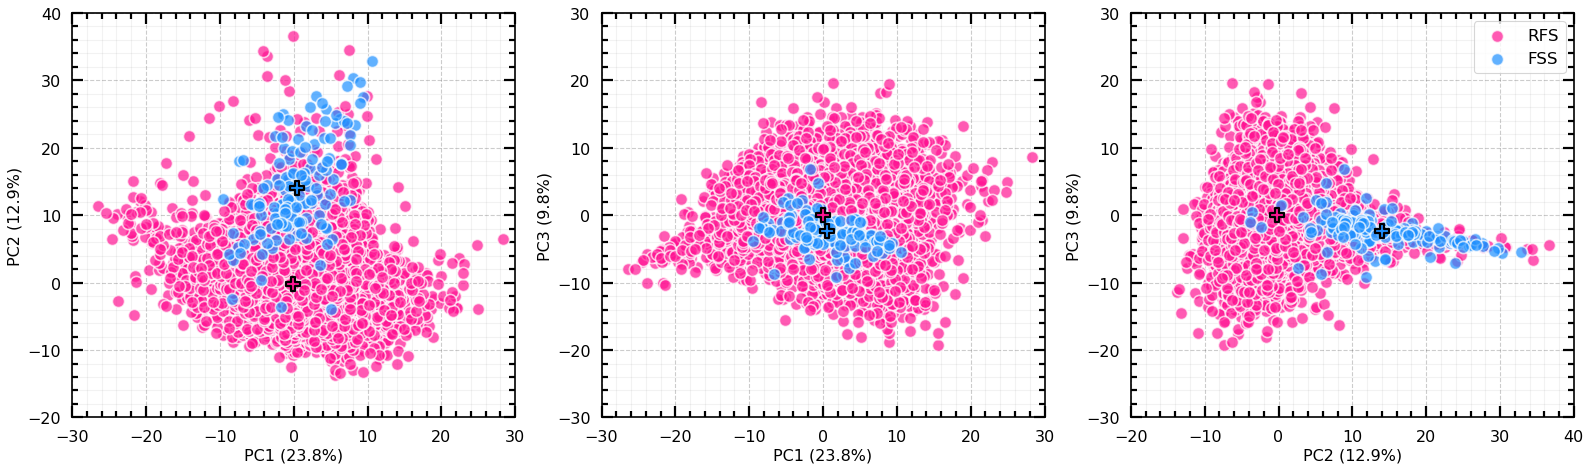

In [20]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )

l_train = 'Fornax+Background+Splus';  PC1min = -30; PC1max = 30;  PC2min = -20; PC2max = 40;  PC3min = -30; PC3max = 30
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]], [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  
    
#    for c, label, color in zip([ 'Splus', 'Background','Fornax' ], [ 'RFS', 'BSS', 'FSS' ], [ 'deeppink', 'orange', 'dodgerblue' ]):
    for c, label, color in zip([ 'Splus', 'Fornax' ], [ 'RFS', 'FSS' ], [ 'deeppink', 'dodgerblue' ]):
#    for c, label, color in zip([ 'Background','Fornax' ], [ 'BSS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )
        a.scatter ( df[x].mean() , df[y].mean(), #label = "C$_{\mathrm{%s}}$" %(label), 
                   s = size*1.0, alpha = 1.0, edgecolors = 'black', color = color, marker = 'P', linewidth = 2, zorder = 3 )
    #biplot ( coeff, x, y, features, scale = 30, arrow_size = 0.11, linewidth = 4, ax = a )
    
    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'upper right', fontsize = 15 )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_03.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [21]:
i = 0; l = 'Fornax'
Fornax_proyecciones = proyecciones[ proyecciones['label'] == l ]
#for c_train in [ 'Fornax+Background+Splus' ]:
#    s2 = Fornax_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].mean().squeeze() 
#    Fornax_proyecciones['Distance ' + c_train + ' center'] = [ np.linalg.norm(Fornax_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].T[h].squeeze().values-s2.values) for h in Fornax_proyecciones.T.columns ]

##
i = 1; l = 'Background'
Background_proyecciones = proyecciones[ proyecciones['label'] == l ]
#for c_train in [ 'Fornax+Background+Splus' ]:
#    s2 = Background_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].mean().squeeze() 
#    Background_proyecciones['Distance ' + c_train + ' center'] = [ np.linalg.norm(Background_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].T[h].squeeze().values-s2.values) for h in Background_proyecciones.T.columns ]
    
##
i = 2; l = 'Splus'
Splus_proyecciones = proyecciones[ proyecciones['label'] == l ]
c_train = 'Fornax+Background+Splus'
for l_train in [ 'Fornax', 'Background' ]:
    df = proyecciones[ proyecciones['label'] == l_train ]
    s2 = df [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].mean().squeeze() 
    Splus_proyecciones['Distance ' + l_train + ' center'] = [ np.linalg.norm(Splus_proyecciones [[ "PC" + str(j+1) + " (" + c_train + " trained)" for j in range(len(prop_components[i])) ]].T[h].squeeze().values-s2.values) for h in Splus_proyecciones.T.columns ]

Splus_proyecciones['Distance total'] = Splus_proyecciones['Distance Background center'] + Splus_proyecciones['Distance Fornax center']
Splus_proyecciones['Distance Background center percent'] = Splus_proyecciones['Distance Background center']/Splus_proyecciones['Distance total']
Splus_proyecciones['Distance Fornax center percent'] = Splus_proyecciones['Distance Fornax center']/Splus_proyecciones['Distance total']

In [22]:
Splus_proyecciones

ID         RA        DEC  \
0       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00486'  41.631114 -30.995514   
1       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00494'  41.631454 -31.130897   
3       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00838'  41.650450 -30.290130   
4       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01417'  41.681696 -31.291301   
5       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01685'  41.696469 -30.998878   
...                                        ...        ...        ...   
100265  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12560'  58.036960 -42.062964   
100266  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12569'  58.038060 -42.088525   
100284  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12892'  58.079472 -42.068244   
100299  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.13065'  58.101329 -42.095107   
100314  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.13252'  58.127350 -41.381572   

        R_t_G [arcsec]  R_e_G [arcsec]   <mu_e_G>   A_IMAGE   B_IMAGE  \
0             8.309404        1.763875  23.415157  2.644781  1.689814   
1             3.545721        1.460416  23.498930  1.654280  1.338583   
3             2.092938        1.380225  23.485165  2.576553  1.844335   
4             3.008652        1.179790  23.314354  1.547233  1.318853   
5             2.453251        1.103169  23.168636  1.539985  1.360538   
...                ...             ...        ...       ...       ...   
100265        3.574141        1.554873  22.333485  2.719005  2.363396   
100266        4.452513        1.874632  23.204056  2.466468  2.195805   
100284        8.747645        3.470337  23.556662  4.297625  2.241710   
100299        6.568694        3.114269  22.732697  4.230775  3.640914   
100314        1.810929        1.018733  22.130011  2.196886  2.018294   

        ELONGATION  ELLIPTICITY  ...  PC84 (Fornax+Background+Splus trained)  \
0         1.565132     0.361076  ...                            3.986695e-16   
1         1.235844     0.190836  ...                            5.285886e-16   
3         1.397009     0.284185  ...                            4.795352e-16   
4         1.173166     0.147605  ...                            1.166807e-15   
5         1.131894     0.116525  ...                            5.329587e-16   
...            ...          ...  ...                                     ...   
100265    1.150465     0.130786  ...                            1.808226e-16   
100266    1.123264     0.109737  ...                            4.152592e-16   
100284    1.917119     0.478384  ...                           -5.540551e-17   
100299    1.162009     0.139421  ...                            2.910770e-16   
100314    1.088486     0.081293  ...                           -2.852541e-16   

        PC85 (Fornax+Background+Splus trained)  \
0                                -2.636780e-16   
1                                 8.326673e-17   
3                                -4.440892e-16   
4                                -7.771561e-16   
5                                -1.332268e-15   
...                                        ...   
100265                           -2.220446e-16   
100266                           -1.110223e-16   
100284                            6.661338e-16   
100299                           -2.220446e-16   
100314                           -5.551115e-17   

        PC86 (Fornax+Background+Splus trained)  \
0                                 4.579670e-16   
1                                 1.554312e-15   
3                                -1.221245e-15   
4                                 1.332268e-15   
5                                 2.442491e-15   
...                                        ...   
100265                            1.221245e-15   
100266                            1.221245e-15   
100284                            1.110223e-15   
100299                            4.440892e-16   
100314                           -9.714451e-16   

        PC87 (Fornax+Background+Splus trained)  \
0                                 5.828671e-16   
1                                -1.998

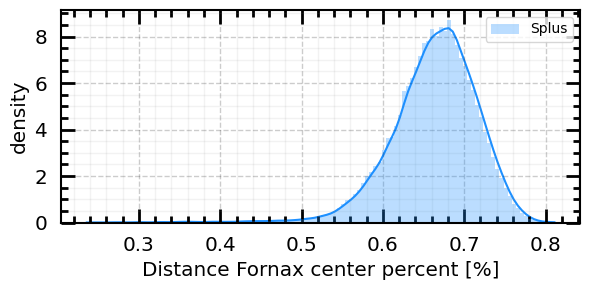

In [25]:
col = Splus_proyecciones['Distance Fornax center percent'] 
label = "Distance Fornax center percent [%]"
Nbins = 0.05/10
output = "figures/Fornax-PCA_04.jpg"

crea_histograma ( col, label, Nbins , output)#, lim = lim )
frq, edges, den = calcula_histograma ( col, Nbins )
den

In [26]:
dd = Splus_proyecciones['Distance Fornax center percent'] / Splus_proyecciones['Distance Background center percent'] 
dd.describe()

count    59814.000000
mean         2.041690
std          0.459279
min          0.308730
25%          1.732795
50%          2.015029
75%          2.324429
max          4.469764
dtype: float64

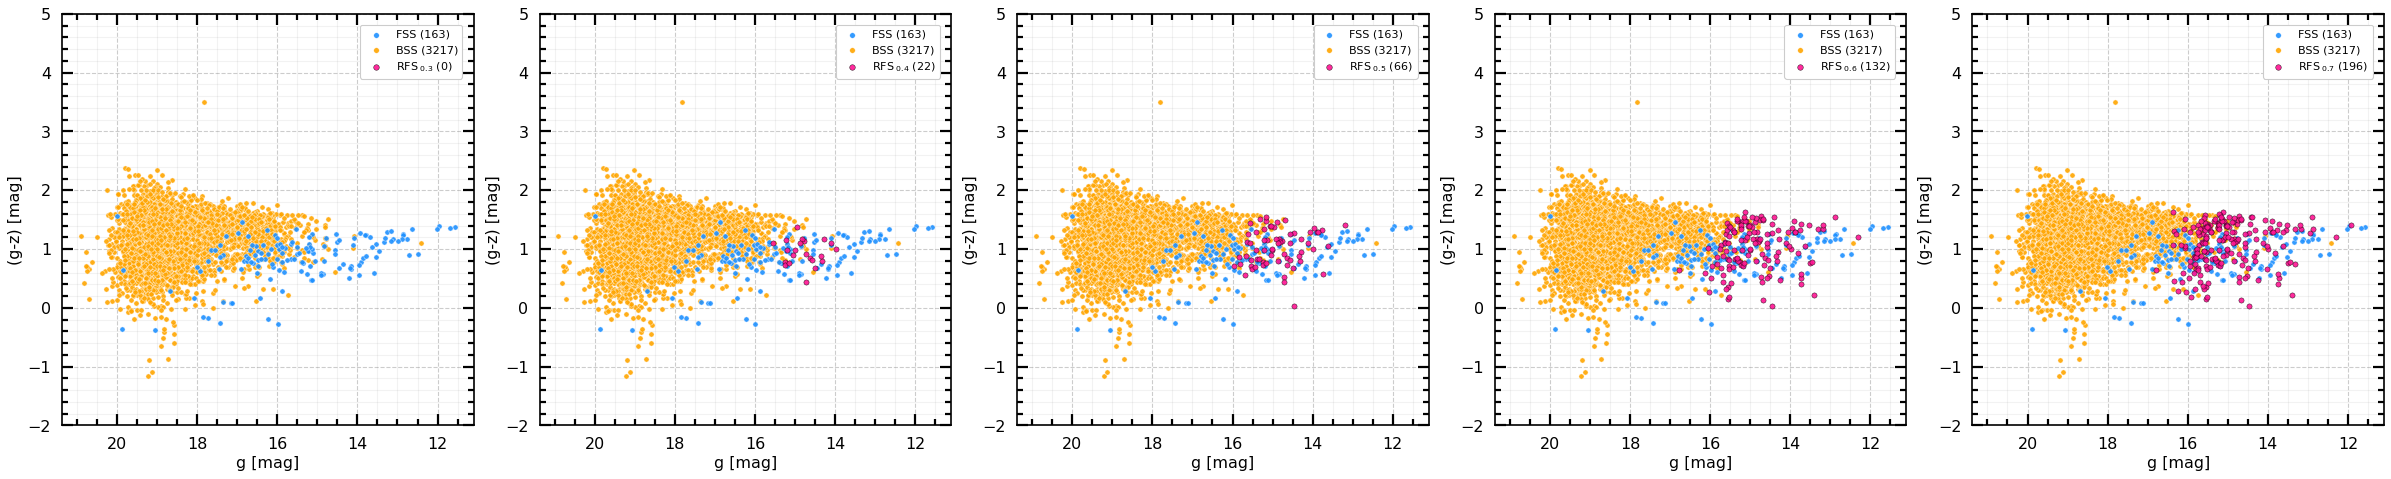

In [27]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2, ax3, ax4) ) = plt.subplots ( ncols = 5, nrows = 1, figsize = (10*3, 6*3), dpi = 80 )

x = 'G_auto'; y = 'G_auto-Z_auto'

for a, AA in zip([ ax0, ax1, ax2, ax3, ax4 ], [0.3, 0.4, 0.5, 0.6, 0.7]):
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )    
    cond = Splus_proyecciones['Distance Fornax center']/Splus_proyecciones['Distance Background center']
    d = Splus_proyecciones[ (cond < AA) ]
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (AA, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )

#d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] > A]
#ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
#             linewidth = 0.4, label = 'RFS$^{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
#             zorder = 4 )

for a in [ ax0, ax1, ax2, ax3, ax4 ]:
    a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "(g-z) [mag]" )
    
for a in [ ax0, ax1, ax2, ax3, ax4 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_05.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

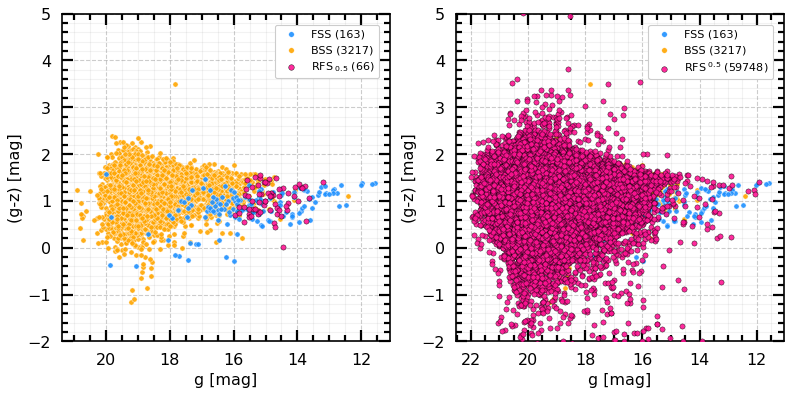

In [64]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1) ) = plt.subplots ( ncols = 2, nrows = 1, figsize = (10, 6), dpi = 80 )

x = 'G_auto'; y = 'G_auto-Z_auto'
for a in [ ax0, ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
A = 0.5
#cond = Splus_proyecciones['Distance Fornax center percent']
cond = Splus_proyecciones['Distance Fornax center percent'] / Splus_proyecciones['Distance Background center percent'] 

d = Splus_proyecciones[ cond < A]
ax0.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
d = Splus_proyecciones[ cond > A]
ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$^{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )

for a in [ ax0, ax1 ]:
    a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "(g-z) [mag]" )
    
for a in [ ax0, ax1 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_06.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

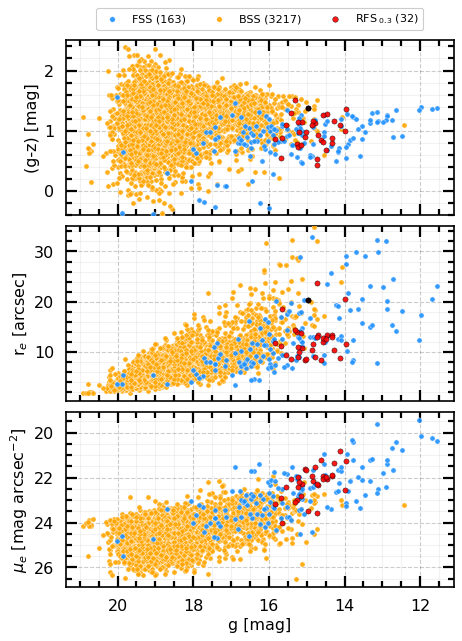

In [67]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 1, nrows = 3, sharex=True, figsize = (6, 8), dpi = 80 )

A = 0.30
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < A]

x = 'G_auto'; y = 'G_auto-Z_auto'
for a in [ ax0 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*2.2, alpha = 0.9,       edgecolors = 'black', color = 'black', marker = '.', 
                 linewidth = 0.4, label = None,
                 zorder = 4 )    
    
    #for i in range(len(candidatas)):
    #    data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
    #    a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
    #                 linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_ylabel ( "(g-z) [mag]" )
    a.set_ylim (-0.4, 2.5)
    
x = 'G_auto'; y = 'R_e_G [arcsec]'
for a in [ ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )    
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*2.2, alpha = 0.9,       edgecolors = 'black', color = 'black', marker = '.', 
                 linewidth = 0.4, label = None, 
                 zorder = 4 )    
    
    #for i in range(len(candidatas)):
    #    data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
    #    a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
    #                 linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_ylabel ( "r$_{e}$ [arcsec]" )
    a.set_ylim (0.1, 35)

x = 'G_auto'; y = '<mu_e_G>'
for a in [ ax2 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'red', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )    
    
    #for i in range(len(candidatas)):
    #    data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
    #    a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
    #                 linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "$\mu_{e}$ [mag arcsec$^{-2}$]" )
    a.invert_yaxis()
    
for a in [ ax0, ax1, ax2 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 0.45/a.get_data_ratio())#, adjustable = 'box' )

    a.invert_xaxis()
    #a.set_xlabel ( "g [mag]" )
    #a.set_ylabel ( "<$\mu_{e}$> [mag arcsec$^{-2}$]" )
    
for a in [ ax0 ]: #, ax1, ax2 ]:
    handles, labels = a.get_legend_handles_labels()
    loc = 'upper center'
    # legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #   ncol=2, mode="expand", borderaxespad=0.)

    lgd = a.legend ( handles, labels, framealpha = 1, bbox_to_anchor = (0.5, 1.25), 
                    loc = loc, ncol = 3, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
#plt.tight_layout()
fig.tight_layout(pad=1.0)

plt.savefig ( "figures/Fornax-PCA_07.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [63]:
Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131']['G_auto']

85930    14.960043
Name: G_auto, dtype: float32

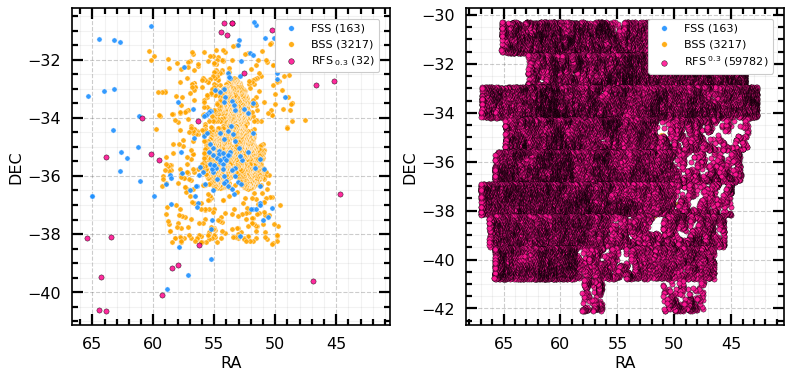

In [28]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1) ) = plt.subplots ( ncols = 2, nrows = 1, figsize = (10, 6), dpi = 80 )

x = 'RA'; y = 'DEC'
for a in [ ax0, ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    
A = 0.30
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < A]
ax0.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] > A]
ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
             linewidth = 0.4, label = 'RFS$^{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )

for a in [ ax0, ax1 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "RA" )
    a.set_ylabel ( "DEC" )

for a in [ ax0, ax1 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_08.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [47]:
coord = SkyCoord.from_name( 'NGC 1399' )
ra = coord.ra.deg
dec = coord.dec.deg
ra

54.62117917

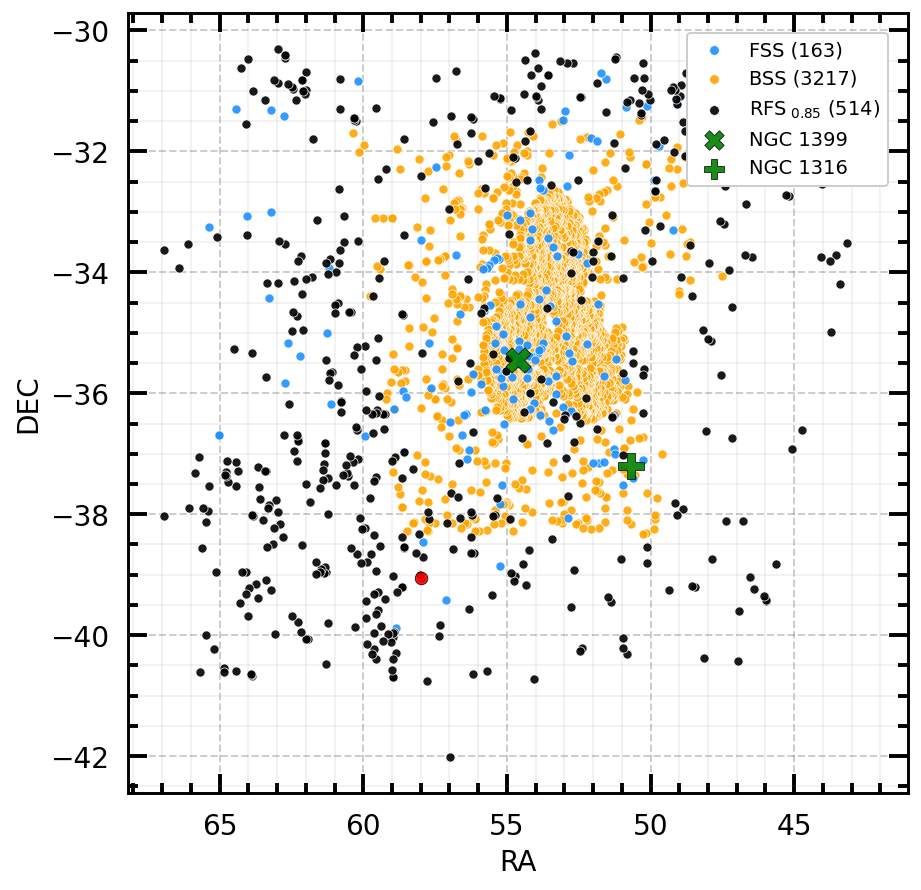

In [52]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )

x = 'RA'; y = 'DEC'
for a in [ ax0 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
             linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 3 )
    d = results[ (results['Prob (Fornax)'] > AA) ]
    a.scatter ( x, y, data = results[ (results['Prob (Fornax)'] > AA) ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (AA, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*4.2, alpha = 0.9, 
               edgecolors = 'black', color = 'red', marker = '.', linewidth = 0.4, label = None, zorder = 4 )  
    
    coord = SkyCoord.from_name( 'NGC 1399' )
    ra = coord.ra.deg
    dec = coord.dec.deg
    a.scatter ( ra, dec, s = size*4.2, alpha = 0.9, edgecolors = 'black', color = 'green', marker = 'X', linewidth = 0.4, 
               label = 'NGC 1399', zorder = 4 )   
    coord = SkyCoord.from_name( 'NGC 1316' )
    ra = coord.ra.deg
    dec = coord.dec.deg
    a.scatter ( ra, dec, s = size*4.2, alpha = 0.9, edgecolors = 'black', color = 'green', marker = 'P', linewidth = 0.4, 
               label = 'NGC 1316', zorder = 4 )   
    
#A = 0.30
#d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] < A]
#AA = 0.85
#d = results[ (results['Prob (Fornax)'] > AA) ]
#ax0.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
#             linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (AA, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
#             zorder = 4 )

for a in [ ax0 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "RA" )
    a.set_ylabel ( "DEC" )

for a in [ ax0 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_08a.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [33]:
#######################################################################################################################
# Apply the random Forest #############################################################################################
#######################################################################################################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

# Create a Gaussian Classifier
clf_test= RandomForestClassifier(n_estimators=100)
print("Gaussian Classifier:", clf_test)

l_train = 'Fornax+Background+Splus'
cond_train = (proyecciones['label'] == 'Fornax' ) | (proyecciones['label'] == 'Background')
#pc1 = proyecciones[(proyecciones['label'] == 'Fornax' ) | (proyecciones['label'] == 'Background')]['PC1 (' + l_train + ' trained)' ]
#pc2 = proyecciones[(proyecciones['label'] == 'Fornax' ) | (proyecciones['label'] == 'Background')]['PC2 (' + l_train + ' trained)' ]

#X_trans = np.vstack((pc1, pc2)).T
X_trans = np.vstack((proyecciones[cond_train][[ "PC" + str(j+1) + " (" + l_train + " trained)" for j in range(len(prop_components[i])) ]].to_numpy()))#.T

Y = proyecciones[cond_train]['label'].values
y = np.where ( Y == 'Fornax', 0 , 1 )

Gaussian Classifier: RandomForestClassifier()


In [34]:
#Balancing the data will to better classification models. We will try balancing our data using SMOTE.
sm = SMOTE(random_state = 33) #33
X_trans_new, y_new = sm.fit_resample(X_trans, y)

print("Sample after pass for SMOTE:", X_trans_new.shape)

Sample after pass for SMOTE: (5776, 88)


In [76]:
# Training
X_train, X_test, y_train, y_test = train_test_split(X_trans_new, y_new, test_size=0.3, random_state=12) # 70% training and 30% test
#Train the model using the training sets y_pred=clf.predict(X_test)
clf_test.fit(X_train, y_train)

y_pred=clf_test.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("Presicion:", metrics.precision_score(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[902   5]
 [  0 826]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       907
           1       0.99      1.00      1.00       826

    accuracy                           1.00      1733
   macro avg       1.00      1.00      1.00      1733
weighted avg       1.00      1.00      1.00      1733

Accuracy: 0.9971148297749567
F1: 0.9969824984912492
Presicion: 0.9939831528279182
Mean Absolute Error: 0.0028851702250432777
Mean Squared Error: 0.0028851702250432777
Root Mean Squared Error: 0.053713780587883383


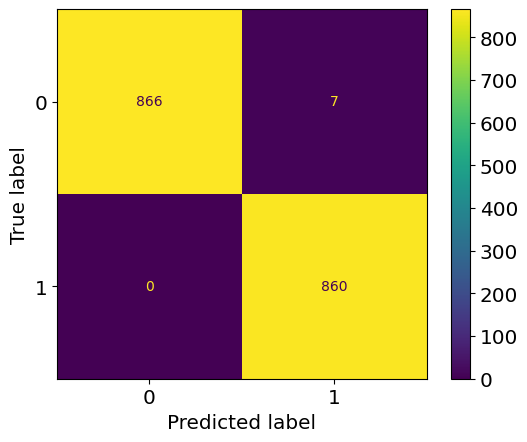

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [36]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_trans_new, y_new)

l_train = 'Fornax+Background+Splus'
cond_test = (proyecciones['label'] == 'Splus' )
#pc1 = proyecciones[(proyecciones['label'] == 'Splus' )]['PC1 (' + l_train + ' trained)' ]
#pc2 = proyecciones[(proyecciones['label'] == 'Splus' )]['PC2 (' + l_train + ' trained)' ]

#df_new_scal_tran = np.vstack((pc1, pc2)).T
df_new_scal_tran = np.vstack((proyecciones[cond_test][[ "PC" + str(j+1) + " (" + l_train + " trained)" for j in range(len(prop_components[i])) ]].to_numpy()))#.T

y_pred_new = clf.predict(df_new_scal_tran)
y_prob = clf.predict_proba(df_new_scal_tran)

In [37]:
#results = pd.DataFrame()

#results['PC1'] = df_new_scal_tran[:,0]
#results['PC2'] = df_new_scal_tran[:,1]
#results['PC3'] = df_new_scal_tran[:,2]
#results = pd.DataFrame ( df_new_scal_tran , columns = [ "PC" + str(j+1) + " (" + l_train + " trained)" for j in range(len(components[0,:])) ] )
l = 'Splus'
results = proyecciones[ proyecciones['label'] == l ]

results['Labels'] = np.where ( y_pred_new == 0, 'Fornax', 'Background' )
results['Labels numeric'] = y_pred_new
results['Prob (Fornax)'] = y_prob[:,0]
results['Prob (Background)'] = y_prob[:,1]

In [53]:
results

ID         RA        DEC  \
0       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00486'  41.631114 -30.995514   
1       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00494'  41.631454 -31.130897   
3       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.00838'  41.650450 -30.290130   
4       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01417'  41.681696 -31.291301   
5       b'iDR4_FORNAX_RUN1_SPLUS-s24s28.01685'  41.696469 -30.998878   
...                                        ...        ...        ...   
100265  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12560'  58.036960 -42.062964   
100266  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12569'  58.038060 -42.088525   
100284  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.12892'  58.079472 -42.068244   
100299  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.13065'  58.101329 -42.095107   
100314  b'iDR4_FORNAX_RUN2_SPLUS-s32s33.13252'  58.127350 -41.381572   

        R_t_G [arcsec]  R_e_G [arcsec]   <mu_e_G>   A_IMAGE   B_IMAGE  \
0             8.309404        1.763875  23.415157  2.644781  1.689814   
1             3.545721        1.460416  23.498930  1.654280  1.338583   
3             2.092938        1.380225  23.485165  2.576553  1.844335   
4             3.008652        1.179790  23.314354  1.547233  1.318853   
5             2.453251        1.103169  23.168636  1.539985  1.360538   
...                ...             ...        ...       ...       ...   
100265        3.574141        1.554873  22.333485  2.719005  2.363396   
100266        4.452513        1.874632  23.204056  2.466468  2.195805   
100284        8.747645        3.470337  23.556662  4.297625  2.241710   
100299        6.568694        3.114269  22.732697  4.230775  3.640914   
100314        1.810929        1.018733  22.130011  2.196886  2.018294   

        ELONGATION  ELLIPTICITY  ...  PC83 (Fornax+Background+Splus trained)  \
0         1.565132     0.361076  ...                           -1.264563e-16   
1         1.235844     0.190836  ...                           -4.748431e-16   
3         1.397009     0.284185  ...                           -7.454761e-16   
4         1.173166     0.147605  ...                           -2.037038e-16   
5         1.131894     0.116525  ...                           -6.355009e-16   
...            ...          ...  ...                                     ...   
100265    1.150465     0.130786  ...                            2.427592e-16   
100266    1.123264     0.109737  ...                            5.706258e-16   
100284    1.917119     0.478384  ...                            7.697079e-16   
100299    1.162009     0.139421  ...                            1.482526e-16   
100314    1.088486     0.081293  ...                           -6.966827e-20   

        PC84 (Fornax+Background+Splus trained)  \
0                                 3.986695e-16   
1                                 5.285886e-16   
3                                 4.795352e-16   
4                                 1.166807e-15   
5                                 5.329587e-16   
...                                        ...   
100265                            1.808226e-16   
100266                            4.152592e-16   
100284                           -5.540551e-17   
100299                            2.910770e-16   
100314                           -2.852541e-16   

        PC85 (Fornax+Background+Splus trained)  \
0                                -2.636780e-16   
1                                 8.326673e-17   
3                                -4.440892e-16   
4                                -7.771561e-16   
5                                -1.332268e-15   
...                                        ...   
100265                           -2.220446e-16   
100266                           -1.110223e-16   
100284                            6.661338e-16   
100299                           -2.220446e-16   
100314                           -5.551115e-17   

        PC86 (Fornax+Background+Splus trained)  \
0                                 4.579670e-16   
1                                 1.554

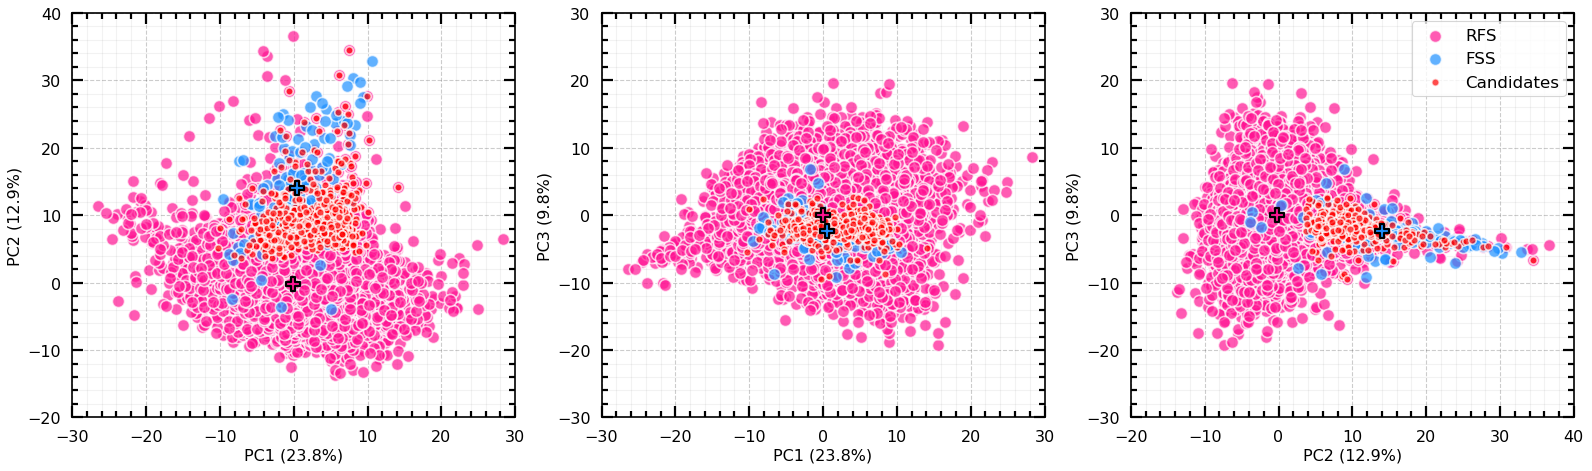

In [17]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )
cond_results = (results['Prob (Fornax)'] > 0.85)

l_train = 'Fornax+Background+Splus';  PC1min = -30; PC1max = 30;  PC2min = -20; PC2max = 40;  PC3min = -30; PC3max = 30
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]], [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  

#    for c, label, color in zip([ 'Splus', 'Background','Fornax' ], [ 'RFS', 'BSS', 'FSS' ], [ 'deeppink', 'orange', 'dodgerblue' ]):
    for c, label, color in zip([ 'Splus', 'Fornax' ], [ 'RFS', 'FSS' ], [ 'deeppink', 'dodgerblue' ]):
#    for c, label, color in zip([ 'Background','Fornax' ], [ 'BSS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )
        a.scatter ( df[x].mean() , df[y].mean(), #label = "C$_{\mathrm{%s}}$" %(label), 
                   s = size*1.0, alpha = 1.0, edgecolors = 'black', color = color, marker = 'P', linewidth = 2, zorder = 3 )
    #biplot ( coeff, x, y, features, scale = 30, arrow_size = 0.11, linewidth = 4, ax = a )
    a.scatter ( x, y, data = results[cond_results], label = 'Candidates', s = size*0.3, alpha = 0.7, edgecolors = 'white', color = 'red', marker = 'o', linewidth = 1.5, zorder = 2 )

    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'upper right', fontsize = 15 )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_09.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

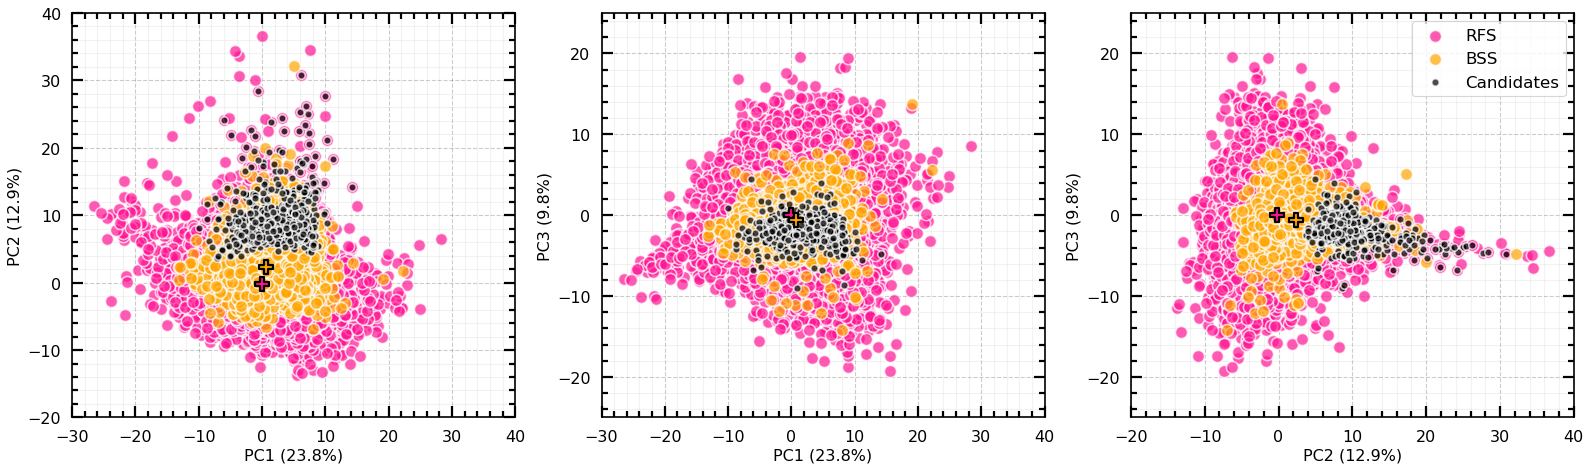

In [328]:
size = 150 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 3, nrows = 1, figsize = (20, 6), dpi = 80 )
cond_results = (results['Prob (Fornax)'] > 0.85)

l_train = 'Fornax+Background+Splus'; PC1min = -30; PC1max = 40;  PC2min = -20; PC2max = 40;  PC3min = -25; PC3max = 25
for PC in zip( [['PC1', 'PC2'], ['PC1', 'PC3'], ['PC2', 'PC3']], [[0, 1], [ 0, 2], [ 1, 2]], [[ ax0 ], [ ax1 ], [ ax2 ]], [[PC1min, PC1max, PC2min, PC2max], [PC1min, PC1max, PC3min, PC3max], [PC2min, PC2max, PC3min, PC3max]] ):
    a = PC[2][0]; x = PC[0][0] + ' (' + l_train + ' trained)'; y = PC[0][1] + ' (' + l_train + ' trained)'
    a.set_xlim ( PC[3][0], PC[3][1] ); a.set_ylim ( PC[3][2], PC[3][3] )  
    
#    for c, label, color in zip([ 'Splus', 'Background','Fornax' ], [ 'RFS', 'BSS', 'FSS' ], [ 'deeppink', 'orange', 'dodgerblue' ]):
#    for c, label, color in zip([ 'Splus', 'Fornax' ], [ 'RFS', 'FSS' ], [ 'deeppink', 'dodgerblue' ]):
    for c, label, color in zip([ 'Splus', 'Background' ], [ 'RFS', 'BSS' ], [ 'deeppink', 'orange' ]):
#    for c, label, color in zip([ 'Background','Fornax' ], [ 'BSS', 'FSS' ], [ 'orange', 'dodgerblue' ]):
        df = proyecciones[ proyecciones['label'] == c ]; 
        a.scatter ( x, y, data = df, label = label, s = size*0.8, alpha = 0.7, edgecolors = 'white', color = color, marker = 'o', linewidth = 1.5, zorder = 2 )
        a.scatter ( df[x].mean() , df[y].mean(), #label = "C$_{\mathrm{%s}}$" %(label), 
                   s = size*1.0, alpha = 1.0, edgecolors = 'black', color = color, marker = 'P', linewidth = 2, zorder = 3 )
    #biplot ( coeff, x, y, features, scale = 30, arrow_size = 0.11, linewidth = 4, ax = a )
    a.scatter ( x, y, data = results[cond_results], label = 'Candidates', s = size*0.3, alpha = 0.7, edgecolors = 'white', color = 'red', marker = 'o', linewidth = 1.5, zorder = 2 )

    custom_axes ( a )
    a.set_xlabel ( xy_labels(l_train)[PC[1][0]] )
    a.set_ylabel ( xy_labels(l_train)[PC[1][1]] )
    if a == ax2: a.legend ( loc = 'upper right', fontsize = 15 )
    #a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_09A.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [59]:
#a.scatter ( x, y, data = results[cond_results], label = 'prob', s = size*0.4, alpha = 0.7, edgecolors = 'white', color = 'black', marker = 'o', linewidth = 1.5, zorder = 2 )
for p in [ 0.70, 0.75, 0.80, 0.85, 0.95, 0.96, 0.97, 0.98, 0.99]:
    cond_results = (results['Prob (Fornax)'] > p)
    print (p, len(results[cond_results]))

0.7 1462
0.75 1106
0.8 830
0.85 514
0.95 45
0.96 30
0.97 17
0.98 11
0.99 6


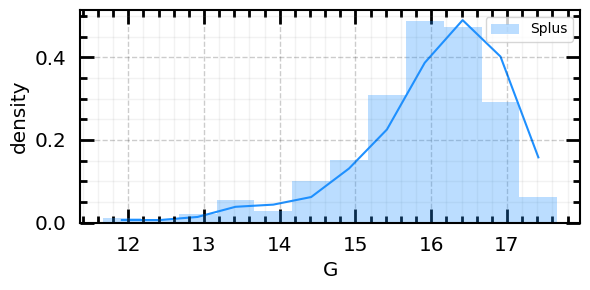

In [64]:
for p in [ 0.85 ]:
    cond_results = (results['Prob (Fornax)'] > p)

col = results[cond_results]['G_auto']
label = "G"
Nbins = 0.5
output = "figures/Fornax-PCA_12.jpg"

crea_histograma ( col, label, Nbins, output)#, lim = lim )
frq, edges, den = calcula_histograma ( col, Nbins )
den

In [ ]:
for p in [ 0.85 ]:
    cond_results = (results['Prob (Fornax)'] > p)
    col = Splus_proyecciones['Distance Fornax center percent'] 
    label = "Distance Fornax center percent [%]"
    Nbins = 0.05/10
    output = "figures/Fornax-PCA_04.jpg"

    crea_histograma ( col, label, Nbins , output)#, lim = lim )
    frq, edges, den = calcula_histograma ( col, Nbins )
    den

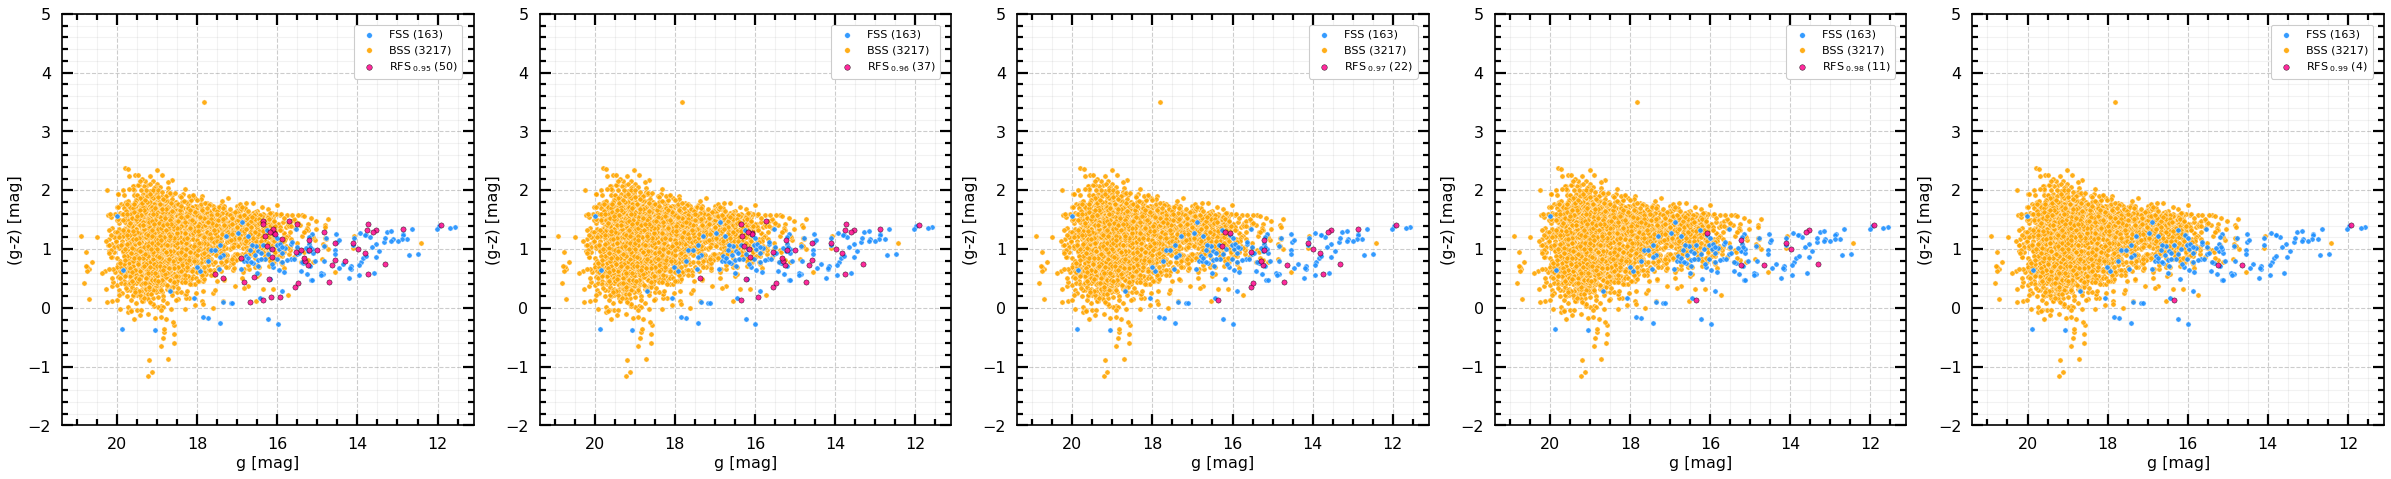

In [289]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2, ax3, ax4) ) = plt.subplots ( ncols = 5, nrows = 1, figsize = (10*3, 6*3), dpi = 80 )

x = 'G_auto'; y = 'G_auto-Z_auto'

for a, AA in zip([ ax0, ax1, ax2, ax3, ax4 ], [0.95, 0.96, 0.97, 0.98, 0.99]):
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )    
    d = results[ (results['Prob (Fornax)'] > AA) ]
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (AA, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )

#d = Splus_proyecciones[Splus_proyecciones['Distance Fornax center percent'] > A]
#ax1.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'black', color = 'deeppink', marker = '.', 
#             linewidth = 0.4, label = 'RFS$^{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
#             zorder = 4 )

for a in [ ax0, ax1, ax2, ax3, ax4 ]:
    a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 1.0/a.get_data_ratio(), adjustable = 'box' )

    a.invert_xaxis()
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "(g-z) [mag]" )
    
for a in [ ax0, ax1, ax2, ax3, ax4 ]:
    handles, labels = a.get_legend_handles_labels()
    if (a == ax0):
        loc = 'upper right'

    lgd = a.legend ( handles, labels, framealpha = 1, loc = loc, ncol = 1, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
plt.tight_layout()
plt.savefig ( "figures/Fornax-PCA_10.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

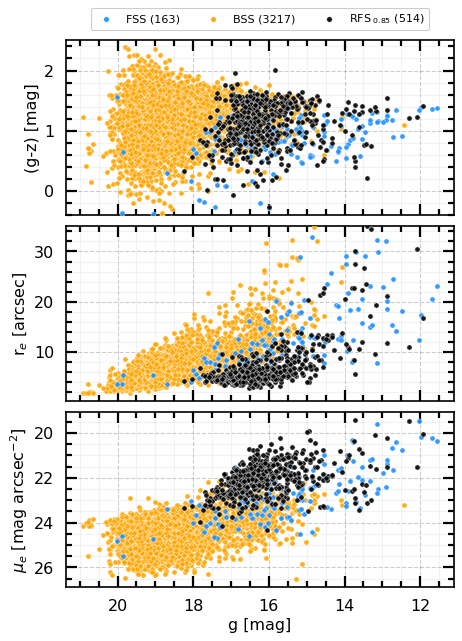

In [57]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
#fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (10/1.5, 10/1.5), dpi = 140 )
fig, ( (ax0, ax1, ax2) ) = plt.subplots ( ncols = 1, nrows = 3, sharex=True, figsize = (6, 8), dpi = 80 )

A = 0.85
d = results[ (results['Prob (Fornax)'] > A) ]
x = 'G_auto'; y = 'G_auto-Z_auto'
for a in [ ax0 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = d, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    #a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*4.2, alpha = 0.9, 
    #           edgecolors = 'black', color = 'red', marker = '.', linewidth = 0.4, label = None, zorder = 4 )    
    
    #for i in range(len(candidatas)):
    #    data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
    #    a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
    #                 linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_ylabel ( "(g-z) [mag]" )
    a.set_ylim (-0.4, 2.5)
    
x = 'G_auto'; y = 'R_e_G [arcsec]'
for a in [ ax1 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = results[ (results['Prob (Fornax)'] > A) ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )    
    #a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*4.2, alpha = 0.9,       
    #           edgecolors = 'black', color = 'red', marker = '.', linewidth = 0.4, label = None, zorder = 4 )    
    
    #for i in range(len(candidatas)):
    #    data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
    #    a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
    #                 linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_ylabel ( "r$_{e}$ [arcsec]" )
    a.set_ylim (0.1, 35)

x = 'G_auto'; y = '<mu_e_G>'
for a in [ ax2 ]:
    a.scatter ( x, y, data = datos[datos['label'] == "Fornax" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
                 linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    a.scatter ( x, y, data = datos[datos['label'] == "Background" ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'orange', marker = '.', 
                 linewidth = 0.4, label = 'BSS (%i)' % (len(Background)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 3 )
    a.scatter ( x, y, data = results[ (results['Prob (Fornax)'] > A) ], s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
                 linewidth = 0.4, label = 'RFS$_{~%s}$ (%i)' % (A, len(d)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
                 zorder = 4 )
    #a.scatter ( x, y, data = Splus_proyecciones[Splus_proyecciones["ID"] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'],s = size*4.2, alpha = 0.9, 
    #           edgecolors = 'black', color = 'red', marker = '.', linewidth = 0.4, label = None, zorder = 4 )   
    
    #for i in range(len(candidatas)):
    #    data = Splus_proyecciones[Splus_proyecciones['RA']==candidatas[i][0]]
    #    a.scatter ( x, y, data = data, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'black', marker = '.', 
    #                 linewidth = 0.4, label = None, zorder = 4 )
    
    a.set_xlabel ( "g [mag]" )
    a.set_ylabel ( "$\mu_{e}$ [mag arcsec$^{-2}$]" )
    a.invert_yaxis()
    
for a in [ ax0, ax1, ax2 ]:
    #a.set_ylim (-2, 5)
    custom_axes ( a )
    a.set_aspect ( 0.45/a.get_data_ratio())#, adjustable = 'box' )

    a.invert_xaxis()
    #a.set_xlabel ( "g [mag]" )
    #a.set_ylabel ( "<$\mu_{e}$> [mag arcsec$^{-2}$]" )
    
for a in [ ax0 ]: #, ax1, ax2 ]:
    handles, labels = a.get_legend_handles_labels()
    loc = 'upper center'
    # legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #   ncol=2, mode="expand", borderaxespad=0.)

    lgd = a.legend ( handles, labels, framealpha = 1, bbox_to_anchor = (0.5, 1.25), 
                    loc = loc, ncol = 3, borderaxespad = 1. )
    for legend_handle in lgd.legendHandles:
        legend_handle.set_sizes([100])
    
#plt.tight_layout()
fig.tight_layout(pad=1.0)

plt.savefig ( "figures/Fornax-PCA_11.jpg", dpi = 250, facecolor = 'w', edgecolor = 'w',
            orientation = 'portrait', format = None, transparent = False, 
            bbox_inches = 'tight', pad_inches = 0.01 )
plt.show()

In [319]:
#results[ (results['Prob (Fornax)'] > 0.99) ][['RA', 'DEC', 'ID']].to_csv( 'candidatas_0.99.csv', index = False )
results[ (results['Prob (Fornax)'] > 0.85) & (results['ID'] == b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131') ]

ID         RA        DEC  \
85930  b'iDR4_FORNAX_RUN2_SPLUS-s30s35.03131'  58.002403 -39.047814   

       R_t_G [arcsec]  R_e_G [arcsec]   <mu_e_G>    A_IMAGE    B_IMAGE  \
85930       47.695206       20.337709  23.497002  21.359238  15.494442   

       ELONGATION  ELLIPTICITY  ...  PC83 (Fornax+Background+Splus trained)  \
85930     1.37851     0.274579  ...                           -1.357007e-16   

       PC84 (Fornax+Background+Splus trained)  \
85930                            5.592879e-16   

       PC85 (Fornax+Background+Splus trained)  \
85930                            2.220446e-16   

       PC86 (Fornax+Background+Splus trained)  \
85930                           -1.887379e-15   

       PC87 (Fornax+Background+Splus trained)  \
85930                            3.330669e-16   

       PC88 (Fornax+Background+Splus trained)  Labels  Labels numeric  \
85930                            1.776357e-15  Fornax               0   

       Prob (Fornax)  Prob (Background)  
85930           0.87               0.13  

[1 rows x 449 columns]

In [308]:
results[ (results['Prob (Fornax)'] > 0.99) ]

ID         RA        DEC  \
1396   b'iDR4_FORNAX_RUN1_SPLUS-s26s33.16283'  51.819186 -33.485756   
2443   b'iDR4_FORNAX_RUN1_SPLUS-s28s34.01225'  54.192701 -35.999080   
2594   b'iDR4_FORNAX_RUN1_SPLUS-s28s38.08977'  61.334870 -36.816364   
55445  b'iDR4_FORNAX_RUN2_SPLUS-s27s38.02661'  60.220722 -35.238287   

       R_t_G [arcsec]  R_e_G [arcsec]   <mu_e_G>    A_IMAGE    B_IMAGE  \
1396        43.024071       21.329340  23.283123  30.187668  22.186750   
2443        58.915169       16.812824  20.038366  53.851410  17.360960   
2594        12.713800        5.806300  22.169100   8.976057   7.439087   
55445       20.905054        8.951117  21.994598  17.690346   8.106235   

       ELONGATION  ELLIPTICITY  ...  PC83 (Fornax+Background+Splus trained)  \
1396     1.360617     0.265039  ...                           -1.861240e-16   
2443     3.101868     0.677614  ...                           -2.659773e-15   
2594     1.206607     0.171230  ...                            8.489591e-16   
55445    2.182314     0.541771  ...                           -1.333678e-16   

       PC84 (Fornax+Background+Splus trained)  \
1396                             9.511014e-16   
2443                             1.367939e-15   
2594                             1.333543e-16   
55445                            2.644729e-16   

       PC85 (Fornax+Background+Splus trained)  \
1396                             7.771561e-16   
2443                            -2.359224e-15   
2594                             4.440892e-16   
55445                            0.000000e+00   

       PC86 (Fornax+Background+Splus trained)  \
1396                            -3.330669e-15   
2443                            -3.330669e-15   
2594                            -7.771561e-16   
55445                           -1.332268e-15   

       PC87 (Fornax+Background+Splus trained)  \
1396                             9.159340e-16   
2443                             4.218847e-15   
2594                             4.440892e-16   
55445                            1.221245e-15   

       PC88 (Fornax+Background+Splus trained)  Labels  Labels numeric  \
1396                             8.881784e-16  Fornax               0   
2443                             1.332268e-15  Fornax               0   
2594                             4.440892e-16  Fornax               0   
55445                            4.440892e-16  Fornax               0   

       Prob (Fornax)  Prob (Background)  
1396             1.0                0.0  
2443             1.0                0.0  
2594             1.0                0.0  
55445            1.0                0.0  

[4 rows x 449 columns]

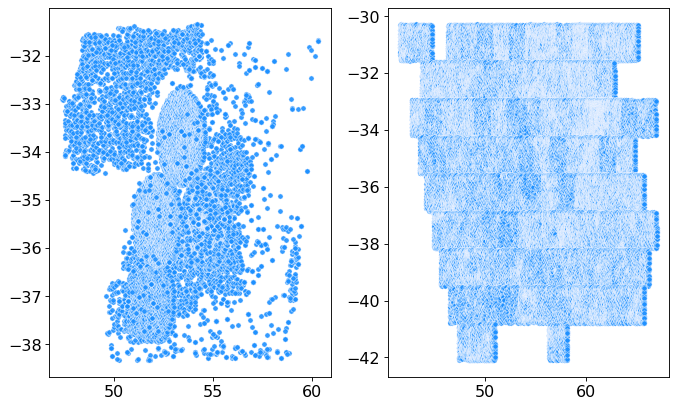

In [307]:
size = 40 # Tamaño por defecto para las fuentes de los graficos
fig, ( (ax0, ax1) ) = plt.subplots ( ncols = 2, nrows = 1, figsize = (10, 6), dpi = 80 )

x = 'RA_Spec'; y = 'Dec_Spec'
ax0.scatter ( x, y, data = SpecZ, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
             linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )
x = 'RA'; y = 'DEC'
ax1.scatter ( x, y, data = Splus, s = size*2.2, alpha = 0.9, edgecolors = 'white', color = 'dodgerblue', marker = '.', 
             linewidth = 0.4, label = 'FSS (%i)' % (len(Fornax)), #label = 'S-PLUS (%i)' % (len(catalogue)), 
             zorder = 4 )

In [303]:
SpecZ

ID_Spec    RA_Spec   Dec_Spec         z      zerr  \
0         b'PSCz J-027-010'  55.498211 -38.029109  0.045171  0.000167   
1         b'PSCz J-032-005'  58.659725 -37.881428  0.188841  0.000267   
2         b'PSCz J-027-008'  55.014532 -37.791900  0.046109  0.000137   
3         b'PSCz J-027-007'  51.539116 -37.715334  0.083574  0.000260   
4         b'PSCz J-025-801'  50.672950 -37.207615  0.005981  0.000040   
...                     ...        ...        ...       ...       ...   
20271  b'1WGA J0336.4-3458'  54.115800 -34.977200  0.006200       NaN   
20272  b'1WGA J0336.4-3458'  54.114600 -34.970200  0.006200       NaN   
20273  b'1WGA J0336.4-3457'  54.107900 -34.964100  0.006200       NaN   
20274  b'1WGA J0335.1-3432'  53.781200 -34.534500  0.000000       NaN   
20275         b'A0333-3246'  53.834300 -32.601400  0.003976  0.000097   

           zflg class_Spec    catalogue  match_Spec      vr SpecZ  
0      b'-99.0'  b'GALAXY'  b'iraspscz'        True  13551.374932  
1      b'-99.0'  b'GALAXY'  b'iraspscz'        True  56652.192364  
2      b'-99.0'  b'GALAXY'  b'iraspscz'        True  13832.569464  
3      b'-99.0'  b'GALAXY'  b'iraspscz'        True  25072.345216  
4      b'-99.0'  b'GALAXY'  b'iraspscz'        True   1794.241268  
...         ...        ...          ...         ...           ...  
20271       NaN  b'GALAXY'    b'wgacat'        True   1860.000000  
20272       NaN  b'GALAXY'    b'wgacat'        True   1860.000000  
20273       NaN  b'GALAXY'    b'wgacat'        True   1860.000000  
20274       NaN  b'GALAXY'    b'wgacat'        True      0.000000  
20275       NaN  b'GALAXY'      b'zcat'        True   1192.825204  

[20276 rows x 10 columns]

In [118]:
X = np.vstack((pc1, pc2)).T
Y = proyecciones['label'].values
y = np.where ( Y == 'Splus', 0 , np.where ( Y == 'Fornax', 1, 2 ) )
y

array([0, 0, 0, ..., 2, 2, 2])

In [334]:
for i in Splus.index[:5]:
    if Splus.iloc[i, 'Field'] = pd.unique(sorted(Splus['Field']))

0
1
2
3
4


In [105]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

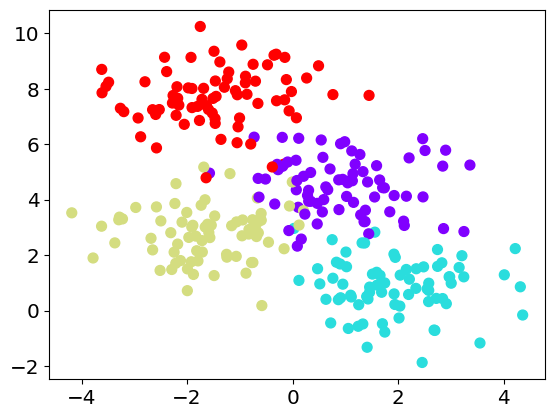

In [79]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [80]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [81]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [36]:
Fornax.columns.values

array(['RA', 'DEC', 'Name', 'Morph_Legacy_Analia', 'Vr_NED/Maddox',
       'e_Vr', 'Vr_Ref', 'Ag', 'Ar', 'Ai', 'Az', 'ID_2', 'Field', 'RA_2',
       'DEC_2', 'X_IMAGE', 'Y_IMAGE', 'THETA_IMAGE', 'ERRTHETA_IMAGE',
       'A_IMAGE', 'ERRA_IMAGE', 'B_IMAGE', 'ERRB_IMAGE', 'X_WORLD',
       'Y_WORLD', 'THETA_WORLD', 'ERRTHETA_WORLD', 'A_WORLD',
       'ERRA_WORLD', 'B_WORLD', 'ERRB_WORLD', 'ELONGATION', 'ELLIPTICITY',
       'KRON_RADIUS', 'PETRO_RADIUS', 'FLUX_auto_U', 'FLUXERR_auto_U',
       'U_auto', 'e_U_auto', 'FLUX_ISO_U', 'FLUXERR_ISO_U', 'U_ISO',
       'e_U_ISO', 'FLUX_PETRO_U', 'FLUXERR_PETRO_U', 'U_PETRO',
       'e_U_PETRO', 'U_APER_3', 'U_APER_6', 'e_U_APER_3', 'e_U_APER_6',
       'FLUX_APER_3_U', 'FLUX_APER_6_U', 'FLUXERR_APER_3_U',
       'FLUXERR_APER_6_U', 'FLAGS_U', 'FWHM_IMAGE_U', 'FWHM_WORLD_U',
       'ISOAREA_IMAGE_U', 'ISOAREA_WORLD_U', 'FLUX_RADIUS_20_U',
       'FLUX_RADIUS_50_U', 'FLUX_RADIUS_70_U', 'FLUX_RADIUS_90_U',
       'FLUX_MAX_U', 'SNR_WIN_U', 'MU_THRES

In [58]:
Fornax[Fornax['Name'] == b'NGC_1379/FCC_161'][filters]

U_auto  F378_auto  F395_auto  F410_auto  F430_auto     G_auto  \
147  13.347072  12.925506  12.912774  12.103552  12.075068  11.566531   

     F515_auto     R_auto  F660_auto     I_auto  F861_auto     Z_auto  
147  11.383976  10.842527  10.749874  10.447724   10.31854  10.184122

In [24]:
def calcula_histograma ( data, Nbins, lim = 'None', density = True ):
    if lim == 'None':
        vmin = data.min(); vmax = data.max()
    else:
        vmin = lim[0]; vmax = lim[1]
        
    bins = np.arange ( vmin, vmax, Nbins )
    frq, edges = np.histogram ( data, bins, density = density )
    den = stats.kde.gaussian_kde ( data )
    return frq, edges, den

def crea_histograma ( col, xlabel, Nbins, output, lim = 'None' ):
    fig, ax0 = plt.subplots ( ncols = 1, nrows = 1, figsize = (6, 3), dpi = 100 ) 

    kwargs = dict ( alpha = 0.3, edgecolor = None )
    #for tabla, label, color in zip([ Fornax, Background, Splus ], [ 'FSS', 'BSS', 'RFS' ], [ 'dodgerblue', 'orange', 'deeppink' ]):
    data = col #tabla [col]

    frq, edges, den = calcula_histograma ( data, Nbins, lim = lim, density = True )
    ax0.bar ( edges[:-1], frq, width = Nbins, color = color, label = "Splus", zorder = 2, **kwargs )
    ax0.plot ( edges[:-1], den(edges[:-1]), color = color, zorder = 1 )

    custom_axes ( ax0 )
    ax0.set_xlabel ( xlabel ); ax0.set_ylabel ( 'density' )
    #ax0.ticklabel_format ( axis = "y", style = "sci", scilimits = (-2,0) )
    #ax0.use_sticky_edges = False
    #ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) % from matplotlib.ticker import FormatStrFormatter
    #ax0.set_xlim ( lim[0], lim[1] )
    
    plt.legend()
    plt.tight_layout ( rect = (0, 0, 1, 1) )
    plt.savefig ( output, dpi = 550, facecolor = 'w', edgecolor = 'w',
                  orientation = 'portrait', format = None, transparent = False, 
                  bbox_inches = 'tight', pad_inches = 0.01 )
    plt.show()
    plt.close(fig)


Analía Smith Castelli <a.smith.castelli@gmail.com>
Attachments
Jan 25, 2023, 12:19 PM
to me

Hola Juan:

Mil disculpas por la demora. Estuve con el deadline de CHANCES y todavia estoy en modo "enero" resolviendo cuestiones domesticas en casa antes de comenzar a ir regularmente al obser. 

Si mal no recuerdo, yo mire la lista de galaxias con R<0.3 una por una para descartar por morfologia y velocidades radiales en NED o Simbad. Pero como no lo recuerdo exactamente, puedo revisar si es necesario.

Te hago una consulta. Como estuve reviendo los catalogos por el tema de CHANCES, podras ver si tus resultados cambian mucho considerando los catalogos que te adjunto? El catalogo espectroscopico para las de background sigue siendo el que estabas usando que es el que te paso Erik. Ahora te paso un catalogo espectroscopico mas reducido para Fornax (Literature_RUN1+RUN2....), y el fotometrico general tambien mas reducido (Fornax_VAC_RUN1+RUN2....). Son mas reducidos porque impuse condiciones adicionales para seleccionar galaxias. Antes consideraba solo:

class_star_g < 0.35 && class_star_r < 0.35 && class_star_i < 0.35
g_auto < 22 mag && r_auto < 22 mag && i_auto < 22 mag

En estos nuevos estoy considerando:

class_star_g < 0.35 && class_star_r < 0.35 && class_star_i < 0.35
g_auto < 22 mag && r_auto < 22 mag && i_auto < 22 mag
e_g_auto < 0.2 mag && e_r_auto < 0.2 mag && e_i_auto < 0.2 mag
1400 <= X_IMAGE <= 10100 && 1200 <= Y_IMAGE <= 9500
mu_max_r<16 mag
flags_g<4 && flags_r<4 && flags_i<4

Te fijarias a ver que pasa si usas estos nuevos catalogos?

Consulta 1: el catalogo espectroscopico de background de Erik que estas usando cubre todos los campos que abarcan los catalogos de Rodrigo (RUN1+RUN2 = 106 campos)? 

Consulta 2: Me pregunto si, antes de correr el PCA, no habria que cruzar el catalogo espectroscopico de background con el catalogo Fornax_VAC_RUN1+RUN2.... para que este ultimo no incluya galaxias que tienen Vr ya determinadas. Esto es, para que el catalogo de busqueda de nuevas candidatas no incluya galaxias que ya tienen determinaciones de VR?

Mil gracias, Juan!

Abrazo.

Ana.